# Amazon Customer Review Analysis
## By. Andrew Simmons & Jingnan Jin

## Schema Reference
0. marketplace
1. customer_id
2. review_id
3. product_id
4. product_parent
5. product_title
6. product_category
7. star_rating - [1-5]
8. helpful_votes
9. total_votes
10. vine
11. verified_purchase
12. review_headline
13. review_body
14. review_date

In [1]:
from collections import defaultdict
import math
from operator import itemgetter
import os

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
PLOT_DIMENSIONS = (20, 10)

## How many records exist in each category?

Total number of reviews in dataset: 157893444


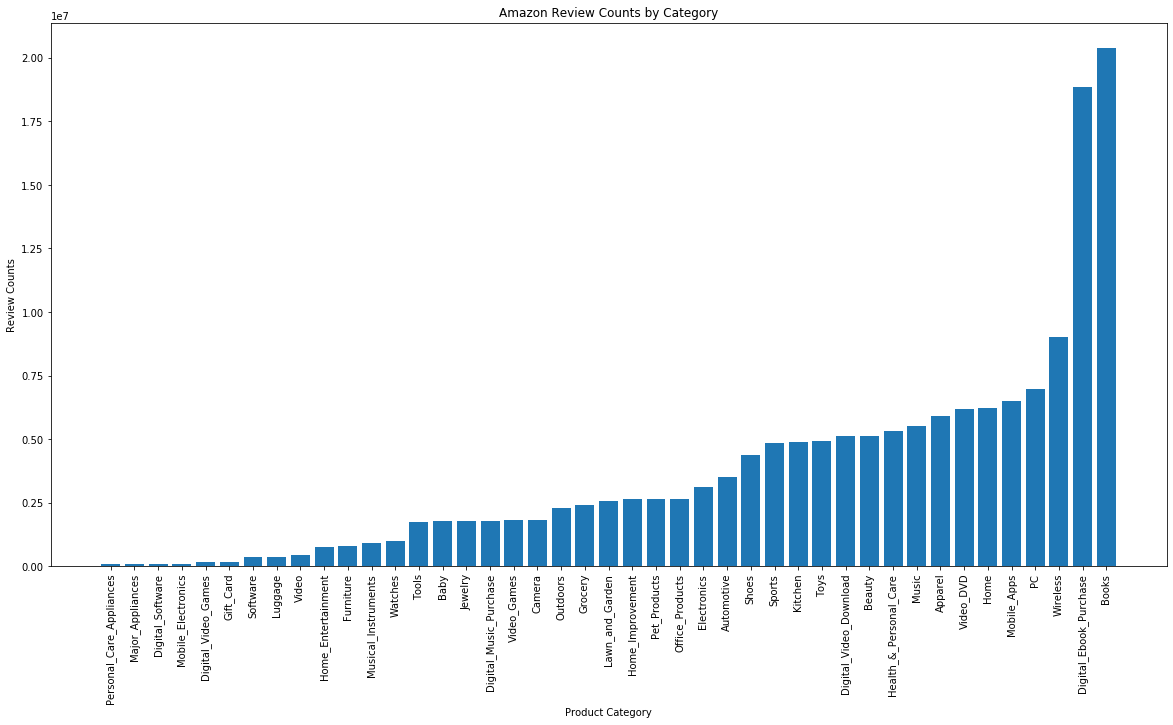

In [3]:
categories = (u'Personal_Care_Appliances', u'Major_Appliances', u'Digital_Software', u'Mobile_Electronics', u'Digital_Video_Games', u'Gift_Card', u'Software', u'Luggage', u'Video', u'Home_Entertainment', u'Furniture', u'Musical_Instruments', u'Watches', u'Tools', u'Baby', u'Jewelry', u'Digital_Music_Purchase', u'Video_Games', u'Camera', u'Outdoors', u'Grocery', u'Lawn_and_Garden', u'Home_Improvement', u'Pet_Products', u'Office_Products', u'Electronics', u'Automotive', u'Shoes', u'Sports', u'Kitchen', u'Toys', u'Digital_Video_Download', u'Beauty', u'Health_&_Personal_Care', u'Music', u'Apparel', u'Video_DVD', u'Home', u'Mobile_Apps', u'PC', u'Wireless', u'Digital_Ebook_Purchase', u'Books')
counts = (85990, 96901, 102084, 105159, 145431, 149086, 341984, 348735, 427319, 742413, 792121, 915728, 971462, 1748610, 1758834, 1767753, 1796750, 1801471, 1818952, 2305596, 2402476, 2558500, 2638512, 2643624, 2644747, 3105328, 3515165, 4374299, 4854496, 4882309, 4922026, 5115244, 5115718, 5332520, 5530282, 5906455, 6166026, 6223566, 6507959, 6965595, 9024783, 18871305, 20370130)

fig, ax = plt.subplots()
fig.set_size_inches(PLOT_DIMENSIONS)

rects = ax.bar(categories, counts)

ax.set_title("Amazon Review Counts by Category")
ax.set_xlabel("Product Category")
ax.set_ylabel("Review Counts")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
filename = 'out/records_in_each_category'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')

print("Total number of reviews in dataset: {}".format(sum(counts)))

## Overall, how satisfied are customers of each product category?

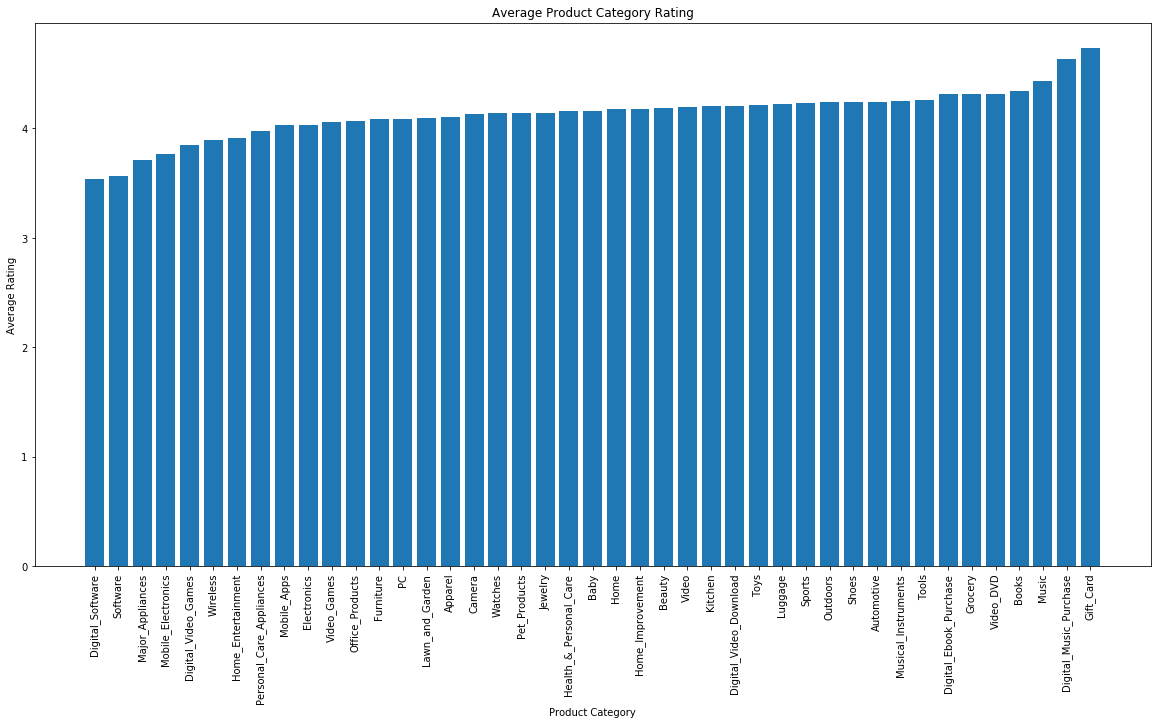

In [4]:
categories = (u'Digital_Software', u'Software', u'Major_Appliances', u'Mobile_Electronics', u'Digital_Video_Games', u'Wireless', u'Home_Entertainment', u'Personal_Care_Appliances', u'Mobile_Apps', u'Electronics', u'Video_Games', u'Office_Products', u'Furniture', u'PC', u'Lawn_and_Garden', u'Apparel', u'Camera', u'Watches', u'Pet_Products', u'Jewelry', u'Health_&_Personal_Care', u'Baby', u'Home', u'Home_Improvement', u'Beauty', u'Video', u'Kitchen', u'Digital_Video_Download', u'Toys', u'Luggage', u'Sports', u'Outdoors', u'Shoes', u'Automotive', u'Musical_Instruments', u'Tools', u'Digital_Ebook_Purchase', u'Grocery', u'Video_DVD', u'Books', u'Music', u'Digital_Music_Purchase', u'Gift_Card')
ratings = (3.5393303553935973, 3.567163960887059, 3.71618455949887, 3.763966945292367, 3.8531262248076406, 3.8921322540386845, 3.9087489039119734, 3.9774624956390277, 4.033718405417121, 4.035706373046583, 4.060906892200873, 4.072483303695968, 4.083950558058681, 4.087352910986068, 4.093193668164941, 4.105233511471771, 4.128970967897998, 4.139306529745888, 4.143652803878313, 4.144090266004357, 4.1617661068312914, 4.163213810967948, 4.1783585166446375, 4.182197390044085, 4.187224158954813, 4.196951223792998, 4.207343082955217, 4.209602709078981, 4.214570382196275, 4.223355843262076, 4.229267672689399, 4.239963115827751, 4.241352500137737, 4.246323856774859, 4.251191401813639, 4.26214078611011, 4.3115579447208345, 4.312220392628272, 4.31263361523289, 4.340152566527558, 4.435110723105983, 4.63857186586893, 4.731363105858364)

fig, ax = plt.subplots()
fig.set_size_inches(PLOT_DIMENSIONS)

rects = ax.bar(categories, ratings)

ax.set_title("Average Product Category Rating")
ax.set_xlabel("Product Category")
ax.set_ylabel("Average Rating")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

filename = 'out/satisfaction_in_each_category'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')

## How does the distribution of review scores change between product category?

Jewelry mean rating: 4.144090266004357
Mobile_Electronics mean rating: 3.763966945292367
Sports mean rating: 4.229267672689399
Camera mean rating: 4.128970967897998
Music mean rating: 4.435110723105983
Electronics mean rating: 4.035706373046583
Lawn_and_Garden mean rating: 4.093193668164941
Beauty mean rating: 4.187224158954813
Automotive mean rating: 4.246323856774859
Major_Appliances mean rating: 3.71618455949887
Musical_Instruments mean rating: 4.251191401813639
Wireless mean rating: 3.8921322540386845
PC mean rating: 4.087352910986068
Baby mean rating: 4.163213810967948
Digital_Ebook_Purchase mean rating: 4.3115579447208345
Personal_Care_Appliances mean rating: 3.9774624956390277
Home_Improvement mean rating: 4.182197390044085
Kitchen mean rating: 4.207343082955217
Grocery mean rating: 4.312220392628272
Pet_Products mean rating: 4.143652803878313
Luggage mean rating: 4.223355843262076
Office_Products mean rating: 4.072483303695968
Health_&_Personal_Care mean rating: 4.1617661068312

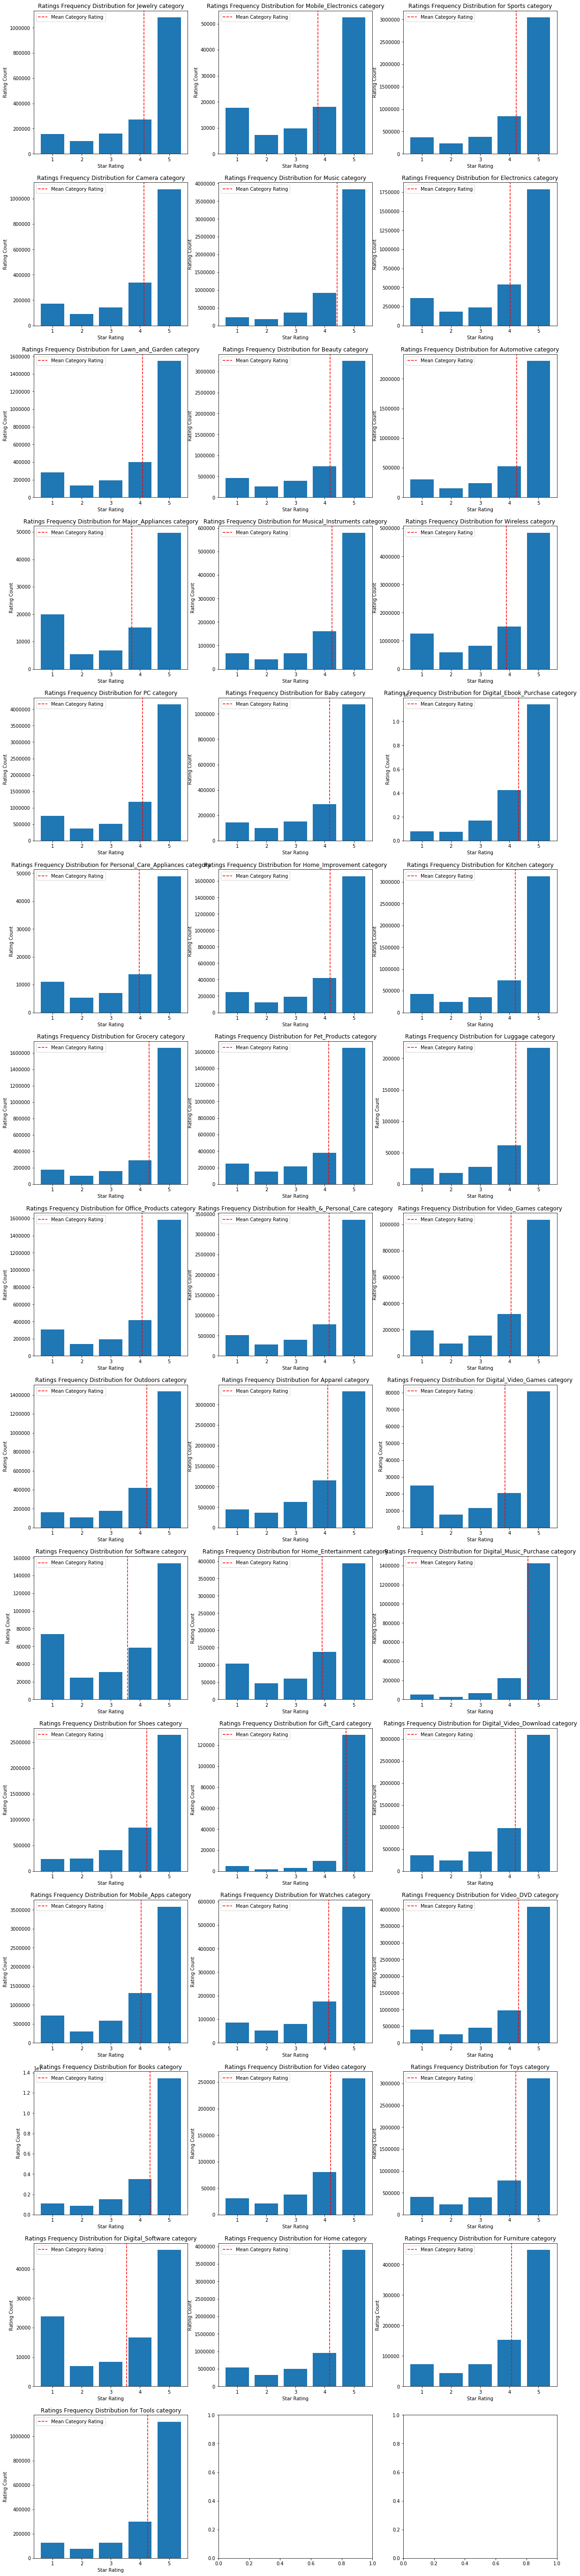

In [5]:
review_distributions = {u'Jewelry': [(1, 155108), (2, 100852), (3, 159735), (4, 270579), (5, 1081479)], u'Mobile_Electronics': [(1, 17600), (2, 7320), (3, 9754), (4, 18112), (5, 52373)], u'Sports': [(1, 363373), (2, 229593), (3, 380838), (4, 837570), (5, 3043122)], u'Camera': [(1, 171072), (2, 91641), (3, 142712), (4, 339725), (5, 1073802)], u'Music': [(1, 233831), (2, 182700), (3, 362407), (4, 915759), (5, 3835585)], u'Electronics': [(1, 359283), (2, 179842), (3, 239471), (4, 538848), (5, 1787884)], u'Lawn_and_Garden': [(1, 281164), (2, 135001), (3, 194700), (4, 401005), (5, 1546630)], u'Beauty': [(1, 456898), (2, 264029), (3, 398405), (4, 741443), (5, 3254943)], u'Automotive': [(1, 299876), (2, 147770), (3, 239894), (4, 526694), (5, 2300931)], u'Major_Appliances': [(1, 19846), (2, 5475), (3, 6718), (4, 15158), (5, 49704)], u'Musical_Instruments': [(1, 66852), (2, 40672), (3, 67847), (4, 160587), (5, 579770)], u'Wireless': [(1, 1265074), (2, 599615), (3, 816954), (4, 1505217), (5, 4837923)], u'PC': [(1, 761848), (2, 365133), (3, 518024), (4, 1178291), (5, 4142299)], u'Baby': [(1, 144809), (2, 101216), (3, 150345), (4, 288194), (5, 1074270)], u'Digital_Ebook_Purchase': [(1, 793563), (2, 738205), (3, 1675730), (4, 4251473), (5, 11412334)], u'Personal_Care_Appliances': [(1, 11036), (2, 5341), (3, 7050), (4, 13661), (5, 48902)], u'Home_Improvement': [(1, 246490), (2, 124710), (3, 189324), (4, 419044), (5, 1658944)], u'Kitchen': [(1, 427485), (2, 242320), (3, 350129), (4, 732838), (5, 3129537)], u'Grocery': [(1, 180049), (2, 105265), (3, 161497), (4, 293389), (5, 1662276)], u'Pet_Products': [(1, 248864), (2, 151283), (3, 216636), (4, 381283), (5, 1645558)], u'Luggage': [(1, 25015), (2, 17875), (3, 27855), (4, 61448), (5, 216542)], u'Office_Products': [(1, 307472), (2, 138653), (3, 193994), (4, 419212), (5, 1585416)], u'Health_&_Personal_Care': [(1, 513174), (2, 278056), (3, 400539), (4, 781957), (5, 3358794)], u'Video_Games': [(1, 193704), (2, 95534), (3, 154877), (4, 320577), (5, 1036779)], u'Outdoors': [(1, 161662), (2, 109599), (3, 179395), (4, 418103), (5, 1436837)], u'Apparel': [(1, 445464), (2, 369608), (3, 623482), (4, 1147254), (5, 3320647)], u'Digital_Video_Games': [(1, 24970), (2, 7749), (3, 11629), (4, 20406), (5, 80677)], u'Software': [(1, 74000), (2, 24663), (3, 30681), (4, 58656), (5, 153984)], u'Home_Entertainment': [(1, 103049), (2, 46175), (3, 60782), (4, 137874), (5, 394533)], u'Digital_Music_Purchase': [(1, 51973), (2, 27573), (3, 67698), (4, 223389), (5, 1426117)], u'Shoes': [(1, 232536), (2, 243188), (3, 404786), (4, 849271), (5, 2644518)], u'Gift_Card': [(1, 4793), (2, 1569), (3, 3156), (4, 9859), (5, 129709)], u'Digital_Video_Download': [(1, 359019), (2, 248464), (3, 443836), (4, 973935), (5, 3089990)], u'Mobile_Apps': [(1, 725271), (2, 301145), (3, 585914), (4, 1312174), (5, 3583455)], u'Watches': [(1, 85943), (2, 52580), (3, 79892), (4, 174835), (5, 578212)], u'Video_DVD': [(1, 396793), (2, 252656), (3, 458712), (4, 975755), (5, 4082110)], u'Books': [(1, 1094799), (2, 847269), (3, 1516391), (4, 3487393), (5, 13424278)], u'Video': [(1, 30645), (2, 21347), (3, 38311), (4, 79915), (5, 257101)], u'Toys': [(1, 401980), (2, 232334), (3, 391441), (4, 778101), (5, 3118170)], u'Digital_Software': [(1, 23783), (2, 6890), (3, 8308), (4, 16693), (5, 46410)], u'Home': [(1, 545074), (2, 324160), (3, 500594), (4, 959576), (5, 3894162)], u'Furniture': [(1, 73320), (2, 43849), (3, 73564), (4, 153667), (5, 447721)], u'Tools': [(1, 127732), (2, 75055), (3, 126637), (4, 300861), (5, 1118325)]}


num_columns = 3

fig, ax = plt.subplots(nrows=math.ceil(len(review_distributions.keys()) / num_columns),
                       ncols=num_columns)
fig.set_size_inches((20, 100))
ax = ax.flatten()

for i, (key, value) in enumerate(review_distributions.items()):
    stars, counts = zip(*value)
    
    rects = ax[i].bar(stars, counts)
    
    # TODO: Calculate mean more efficiantly
    total = 0
    for j in range(len(stars)):
        total += stars[j] * counts[j]
    mean = total / sum(counts)
    
    print('{} mean rating: {}'.format(key, mean))
    
    # TODO: Include a median line
    mean_line = ax[i].axvline(mean, color='red', linestyle='--')
    ax[i].legend([mean_line], ['Mean Category Rating'])
    
    ax[i].set_title('Ratings Frequency Distribution for {} category'.format(key))
    ax[i].set_xlabel('Star Rating')
    ax[i].set_ylabel('Rating Count')


filename = 'out/review_scores_distribution_by_category'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')

## How does the average rating in a category change between verified and unverified purchasers?

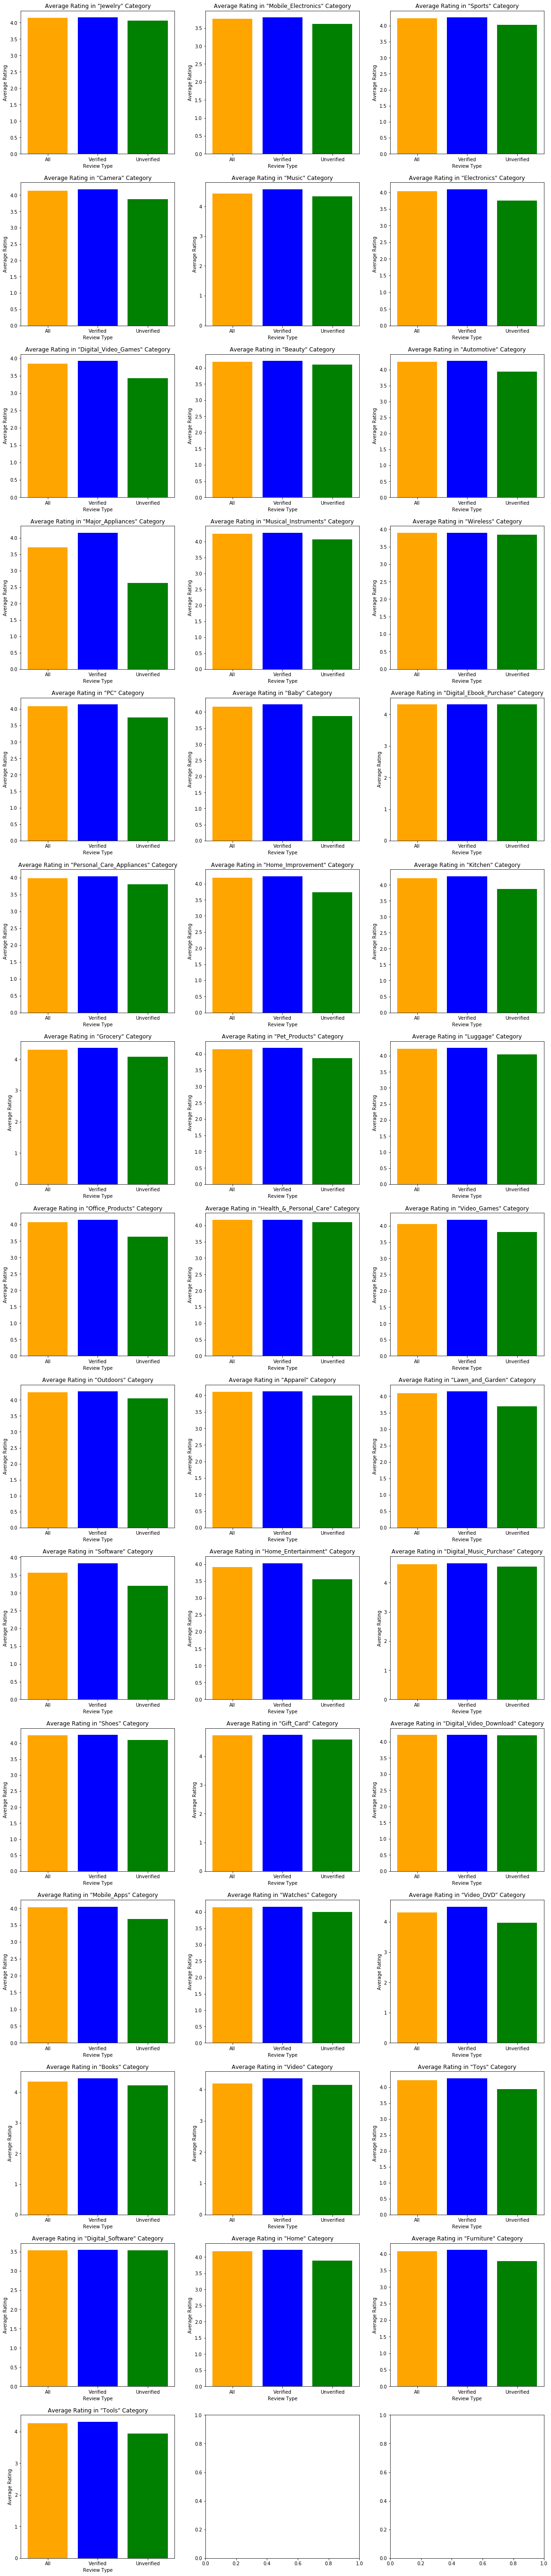

In [6]:
mean_ratings = [(u'Jewelry', 4.144090266004357, 4.155366571088315, 4.05695030733911), (u'Mobile_Electronics', 3.763966945292367, 3.792907017405331, 3.608553428640659), (u'Sports', 4.229267672689399, 4.255905016823825, 4.028012710139385), (u'Camera', 4.128970967897998, 4.179964052107881, 3.880317885929348), (u'Music', 4.435110723105983, 4.573386845900977, 4.335351343207668), (u'Electronics', 4.035706373046583, 4.090258670031929, 3.7481206955748996), (u'Digital_Video_Games', 3.8531262248076406, 3.92431384536182, 3.4340042623727207), (u'Beauty', 4.187224158954813, 4.2065635363452, 4.094824188198196), (u'Automotive', 4.246323856774859, 4.273324227388452, 3.9420533673059808), (u'Major_Appliances', 3.71618455949887, 4.161018549453104, 2.624741606671894), (u'Musical_Instruments', 4.251191401813639, 4.279404571256672, 4.072001412894266), (u'Wireless', 3.8921322540386845, 3.8995353537310122, 3.837352503736851), (u'PC', 4.087352910986068, 4.137295307113534, 3.736308968747875), (u'Baby', 4.163213810967948, 4.236796580484513, 3.8789638268399704), (u'Digital_Ebook_Purchase', 4.3115579447208345, 4.311602033593522, 4.31139893830869), (u'Personal_Care_Appliances', 3.9774624956390277, 4.040634870499052, 3.8010145566828406), (u'Home_Improvement', 4.182197390044085, 4.234266698472475, 3.733159714623364), (u'Kitchen', 4.207343082955217, 4.272268637485119, 3.866607286599685), (u'Grocery', 4.312220392628272, 4.362752008025022, 4.076875256086017), (u'Pet_Products', 4.143652803878313, 4.182244802661451, 3.863502447833191), (u'Luggage', 4.223355843262076, 4.244643459001396, 4.04508064516129), (u'Office_Products', 4.072483303695968, 4.1487592481149775, 3.624548173594888), (u'Health_&_Personal_Care', 4.1617661068312914, 4.173790002323829, 4.101173771130485), (u'Video_Games', 4.060906892200873, 4.191831809791648, 3.8106850244824746), (u'Outdoors', 4.239963115827751, 4.267020963551486, 4.04163460253117), (u'Apparel', 4.105233511471771, 4.118427823651534, 3.9871336753346305), (u'Lawn_and_Garden', 4.093193668164941, 4.14776173793161, 3.6908685108764305), (u'Software', 3.567163960887059, 3.8393743197183317, 3.203037739331342), (u'Home_Entertainment', 3.9087489039119734, 4.028062706673075, 3.5486526419475126), (u'Digital_Music_Purchase', 4.63857186586893, 4.670542673193057, 4.544099422632032), (u'Shoes', 4.241352500137737, 4.2566862945765624, 4.098036108358189), (u'Gift_Card', 4.731363105858364, 4.7461078196439335, 4.577583563324134), (u'Digital_Video_Download', 4.209602709078981, 4.213454348035481, 4.201790892095377), (u'Mobile_Apps', 4.033718405417121, 4.050988335308839, 3.6777269285439114), (u'Watches', 4.139306529745888, 4.162018687054274, 3.993022311751775), (u'Video_DVD', 4.31263361523289, 4.500614917473834, 3.9633384908763403), (u'Books', 4.340152566527558, 4.454880398633391, 4.220545797215845), (u'Video', 4.196951223792998, 4.35507979376381, 4.147483517361303), (u'Toys', 4.214570382196275, 4.271879358780425, 3.939941349939867), (u'Digital_Software', 3.5393303553935973, 3.543014394580864, 3.530969766846016), (u'Home', 4.1783585166446375, 4.214242443692338, 3.884402591149564), (u'Furniture', 4.083950558058681, 4.1154930597230015, 3.7774951976407563), (u'Tools', 4.26214078611011, 4.307558675876055, 3.9432517729520455)]


fig, ax = plt.subplots(
    nrows=math.ceil(len(mean_ratings) / num_columns), ncols=num_columns
)

fig.set_size_inches((20, 100))
ax = ax.flatten()

labels = ["All", "Verified", "Unverified"]

for i, category in enumerate(mean_ratings):
    rects = ax[i].bar(labels, category[1:], color=["orange", "blue", "green"])

    ax[i].set_title('Average Rating in "{}" Category'.format(category[0]))
    ax[i].set_xlabel("Review Type")
    ax[i].set_ylabel("Average Rating")

filename = 'out/verified_vs_unverified_ratings'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')

In [7]:
print(
    "=== Differences between verified review average and unverified review average by stars ===\n"
)

# (category_name, average_difference)
average_difference = []
for category in mean_ratings:
    category_name = category[0]
    verified_review_average = category[2]
    unverified_review_average = category[3]

    average_difference.append(
        (
            category_name,
            abs(abs(verified_review_average) - abs(unverified_review_average)),
        )
    )

# Print differences by category
for category in average_difference:
    print("{}: {}".format(category[0], category[1]))


# Print total average differences
_, difference = zip(*average_difference)
print("Overall: {}".format(sum(difference) / len(difference)))

=== Differences between verified review average and unverified review average by stars ===

Jewelry: 0.09841626374920498
Mobile_Electronics: 0.1843535887646719
Sports: 0.22789230668444027
Camera: 0.2996461661785328
Music: 0.2380355026933092
Electronics: 0.3421379744570294
Digital_Video_Games: 0.4903095829890991
Beauty: 0.11173934814700459
Automotive: 0.331270860082471
Major_Appliances: 1.53627694278121
Musical_Instruments: 0.20740315836240608
Wireless: 0.06218284999416124
PC: 0.40098633836565867
Baby: 0.3578327536445425
Digital_Ebook_Purchase: 0.0002030952848324219
Personal_Care_Appliances: 0.23962031381621163
Home_Improvement: 0.5011069838491111
Kitchen: 0.4056613508854343
Grocery: 0.2858767519390053
Pet_Products: 0.31874235482825997
Luggage: 0.19956281384010577
Office_Products: 0.5242110745200894
Health_&_Personal_Care: 0.0726162311933436
Video_Games: 0.381146785309173
Outdoors: 0.22538636102031617
Apparel: 0.13129414831690367
Lawn_and_Garden: 0.45689322705517954
Software: 0.63633658

## What review ratings do customers find the most helpful?

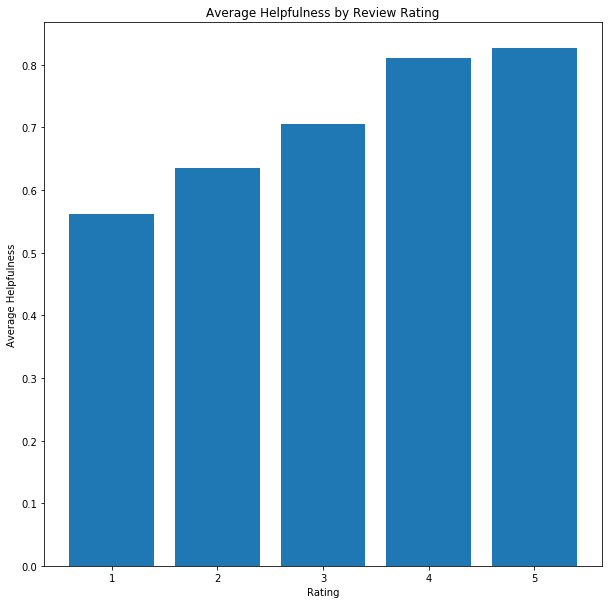

In [8]:
one_star_helpful_votes = 47320942
one_star_total_votes = 84294626

two_star_helpful_votes = 19272456
two_star_total_votes = 30356947

three_star_helpful_votes = 25985553
three_star_total_votes = 36850248

four_star_helpful_votes = 45763452
four_star_total_votes = 56393443

five_star_helpful_votes = 163445301
five_star_total_votes = 197709783

helpful_averages = [
    (1, one_star_helpful_votes / one_star_total_votes),
    (2, two_star_helpful_votes / two_star_total_votes),
    (3, three_star_helpful_votes / three_star_total_votes),
    (4, four_star_helpful_votes / four_star_total_votes),
    (5, five_star_helpful_votes / five_star_total_votes),
]


rating, helpful_average = zip(*helpful_averages)

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

rects = ax.bar(rating, helpful_average)

ax.set_title("Average Helpfulness by Review Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Helpfulness")

filename = 'out/rating_helpfulness'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')

## Does the Amazon Vine program influence customer reviews?

Difference between vine and non-vine average: 0.1213734892492182


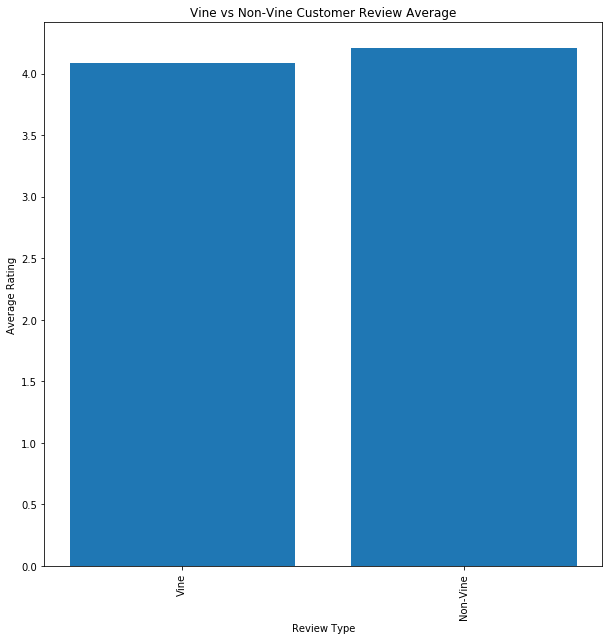

In [9]:
average_vine_rating = 4.083619154286868
average_nonvine_rating = 4.2049926435360865

difference = abs(abs(average_vine_rating) - abs(average_nonvine_rating))
print("Difference between vine and non-vine average: {}".format(difference))

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))

rects = ax.bar(["Vine", "Non-Vine"], [average_vine_rating, average_nonvine_rating])

ax.set_title("Vine vs Non-Vine Customer Review Average")
ax.set_xlabel("Review Type")
ax.set_ylabel("Average Rating")

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

filename = 'out/vine_rating_influence'
fig.savefig(filename + '.pdf')
fig.savefig(filename + '.png')